In [15]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.linalg as la

In [ ]:
data  = np.array([
                  [27,40,25,17],[15,46,70,22],[10,35,66,19],[22,33,25,13],[29,35,43,18],[11,41,13,9],[81,39,41,27]
                  ])
df_data = pd.DataFrame(data,index=["PEA","Assurence vie","Epargne logement","Compte titre","CODEVI","Autres","Aucun"], columns=["G1","G2","G3","G4"])
df_data

In [17]:
n = np.sum(data) 
n

872

In [18]:
freq = data / n
freq

array([[0.0309633 , 0.04587156, 0.02866972, 0.01949541],
       [0.01720183, 0.05275229, 0.08027523, 0.02522936],
       [0.01146789, 0.04013761, 0.07568807, 0.02178899],
       [0.02522936, 0.03784404, 0.02866972, 0.01490826],
       [0.03325688, 0.04013761, 0.04931193, 0.0206422 ],
       [0.01261468, 0.04701835, 0.01490826, 0.0103211 ],
       [0.09288991, 0.04472477, 0.04701835, 0.0309633 ]])

In [63]:
fj = np.sum(freq,axis=0)
fj = fj[..., None]
fi = np.sum(freq,axis=1)
fi = fi[..., None]
profilL = (freq / fi)
profilC = freq / fj.T
print(profilL)
print(profilC)

[[0.24770642 0.36697248 0.2293578  0.1559633 ]
 [0.09803922 0.30065359 0.45751634 0.14379085]
 [0.07692308 0.26923077 0.50769231 0.14615385]
 [0.23655914 0.35483871 0.2688172  0.13978495]
 [0.232      0.28       0.344      0.144     ]
 [0.14864865 0.55405405 0.17567568 0.12162162]
 [0.43085106 0.20744681 0.21808511 0.14361702]]
[[0.13846154 0.14869888 0.08833922 0.136     ]
 [0.07692308 0.17100372 0.24734982 0.176     ]
 [0.05128205 0.13011152 0.23321555 0.152     ]
 [0.11282051 0.12267658 0.08833922 0.104     ]
 [0.14871795 0.13011152 0.15194346 0.144     ]
 [0.05641026 0.15241636 0.0459364  0.072     ]
 [0.41538462 0.14498141 0.14487633 0.216     ]]


In [66]:
X = freq / np.sqrt(fi.dot(fj.T))
X



array([[0.18519669, 0.2335988 , 0.14234216, 0.14564   ],
       [0.08684168, 0.22674409, 0.33640242, 0.15908234],
       [0.06280743, 0.1871631 , 0.34409554, 0.14904826],
       [0.16336684, 0.2086394 , 0.15410095, 0.12057211],
       [0.18574866, 0.19086966, 0.22862316, 0.144     ],
       [0.09157133, 0.29059749, 0.08983266, 0.09357754],
       [0.42304716, 0.17342414, 0.17775086, 0.17612858]])

In [67]:
V = np.transpose(X).dot(X)
print(V)
print()
w,v = la.eig(V)
print(w)

[[0.29432956 0.24422332 0.22825133 0.17967337]
 [0.24422332 0.33549576 0.3066504  0.20836831]
 [0.22825133 0.3066504  0.36751055 0.21674858]
 [0.17967337 0.20836831 0.21674858 0.14378525]]

[1.00000000e+00+0.j 1.01477796e-01+0.j 3.54651201e-04+0.j
 3.92886766e-02+0.j]


In [68]:
pca = PCA()
pca_dataZ = pca.fit_transform(V)
dota = pd.DataFrame(pca_dataZ)
print(dota)

          0         1         2             3
0  0.051284  0.064482 -0.011069  3.149896e-18
1 -0.063785  0.010439  0.029546  3.149896e-18
2 -0.092377 -0.026445 -0.022256  3.149896e-18
3  0.104877 -0.048475  0.003779  3.149896e-18


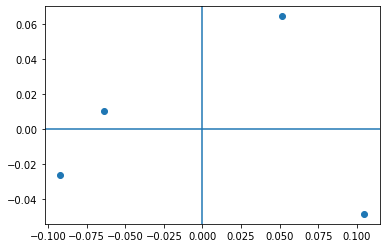

In [69]:
plt.scatter(dota[0],dota[1])
plt.axhline(0)
plt.axvline(0)
plt.show()